# Import Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
%matplotlib inline

Mounted at /content/gdrive


# Load Dataset



In [2]:
path_1 = 'gdrive/My Drive/DigitalSkola/Dataset/order_details.csv'
path_2 = 'gdrive/My Drive/DigitalSkola/Dataset/order_lists.csv'

details = pd.read_csv(path_1)
lists = pd.read_csv(path_2)

In [3]:
# Join Dataset
dataset = pd.merge(details, lists, how='right', left_on='order_id', right_on='order_id')
dataset.head()

,order_id,sales,profit,quantity,category,sub_category,Cost,Total_Cost,Total_profit,order_date,customer_name,city,country,region,segment,ship_date,ship_mode,lon,lat
0,AZ-2011-1029887,85,15,2,Furniture,Furnishings,70,70,30,7/31/2011,Brooke Hodgson,Leipzig,Germany,Central,Consumer,8/3/2011,Economy Plus,12.373075,51.339696
1,AZ-2011-1029887,26,7,2,Office Supplies,Labels,19,19,14,7/31/2011,Brooke Hodgson,Leipzig,Germany,Central,Consumer,8/3/2011,Economy Plus,12.373075,51.339696
2,AZ-2011-107716,294,109,7,Technology,Accessories,185,185,763,4/11/2011,Corey Norton,Marseille,France,Central,Consumer,4/16/2011,Economy,5.369780,43.296482
3,AZ-2011-1087704,76,11,3,Furniture,Furnishings,65,65,33,9/15/2011,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,9/19/2011,Economy,8.403653,49.006890
4,AZ-2011-1087704,252,15,5,Office Supplies,Binders,237,237,75,9/15/2011,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,9/19/2011,Economy,8.403653,49.006890


# Data Quality Checking

In [9]:
# Missing Value
dataset.isnull().sum()

order_id         0
sales            0
profit           0
quantity         0
category         0
sub_category     0
Cost             0
Total_Cost       0
Total_profit     0
order_date       0
customer_name    0
city             0
country          0
region           0
segment          0
ship_date        0
ship_mode        0
lon              0
lat              0
dtype: int64

In [7]:
# Duplicated Value
dataset.duplicated().sum()

0

# Bar Chart

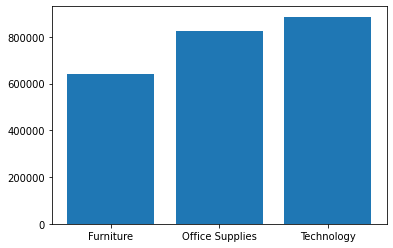

In [21]:
plt.bar(dataset.groupby(['category']).sum()['sales'].index
        , dataset.groupby(['category']).sum()['sales'])
plt.show()

# Pie Chart

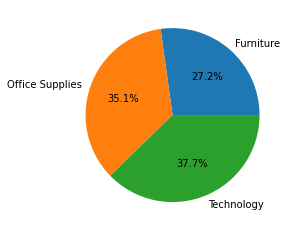

In [7]:
plt.pie(dataset.groupby(['category']).sum()['sales']
        , labels=dataset.groupby(['category']).sum()['sales'].index
        , autopct='%1.1f%%')
plt.show()

# Histogram

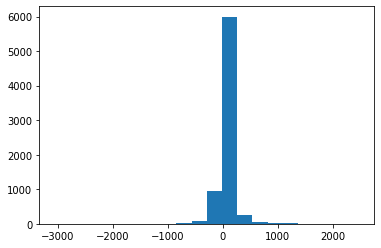

In [10]:
plt.hist(dataset['profit'], bins=20)
plt.show()

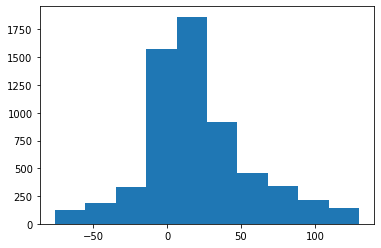

In [20]:
q1 = np.quantile(dataset['profit'], 0.25, axis=0)
q3 = np.quantile(dataset['profit'], 0.75, axis=0)
iqr = (q3-q1) * 1.5
lower = q1 - iqr
upper = q3 + iqr

profit = dataset.loc[(dataset['profit'] < upper) & (dataset['profit'] > lower), 'profit']

plt.hist(profit)
plt.show()

131.0

# Density Plot

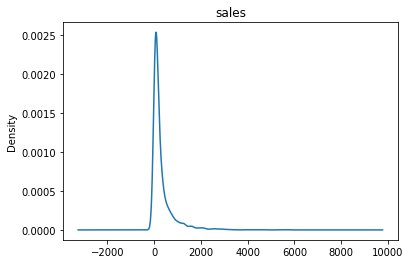

In [22]:
dataset['sales'].plot.density(title='sales')
plt.show()

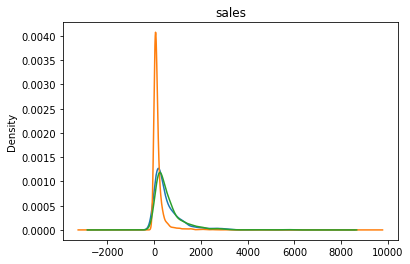

In [20]:
dataset.groupby('category')['sales'].plot.density(title='sales')
plt.show()

#  Line Chart

In [25]:
# https://www.journaldev.com/23365/python-string-to-datetime-strptime
dataset.order_date = pd.to_datetime(dataset.order_date, format="%m/%d/%Y")
dataset.ship_date = pd.to_datetime(dataset.ship_date, format="%m/%d/%Y")

In [26]:
dataset.head()

,order_id,sales,profit,quantity,category,sub_category,Cost,Total_Cost,Total_profit,order_date,customer_name,city,country,region,segment,ship_date,ship_mode,lon,lat
0,AZ-2011-1029887,85,15,2,Furniture,Furnishings,70,70,30,2011-07-31,Brooke Hodgson,Leipzig,Germany,Central,Consumer,2011-08-03,Economy Plus,12.373075,51.339696
1,AZ-2011-1029887,26,7,2,Office Supplies,Labels,19,19,14,2011-07-31,Brooke Hodgson,Leipzig,Germany,Central,Consumer,2011-08-03,Economy Plus,12.373075,51.339696
2,AZ-2011-107716,294,109,7,Technology,Accessories,185,185,763,2011-04-11,Corey Norton,Marseille,France,Central,Consumer,2011-04-16,Economy,5.369780,43.296482
3,AZ-2011-1087704,76,11,3,Furniture,Furnishings,65,65,33,2011-09-15,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,2011-09-19,Economy,8.403653,49.006890
4,AZ-2011-1087704,252,15,5,Office Supplies,Binders,237,237,75,2011-09-15,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,2011-09-19,Economy,8.403653,49.006890


In [46]:
time_series = pd.pivot_table(dataset, values=['Total_profit', 'Total_Cost', 'quantity'], index='order_date', aggfunc=[np.sum, np.mean]).reset_index()[:100]
time_series

order_date        sum               ...        mean                       
              Total_Cost Total_profit  ...  Total_Cost Total_profit  quantity
0  2011-01-01         71          -78  ...   71.000000   -78.000000  3.000000
1  2011-01-03        564         2030  ...  564.000000  2030.000000  7.000000
2  2011-01-04        186           17  ...   62.000000     5.666667  2.333333
3  2011-01-05        199          686  ...  199.000000   686.000000  7.000000
4  2011-01-07        723          614  ...  241.000000   204.666667  2.666667
..        ...        ...          ...  ...         ...          ...       ...
95 2011-05-17        200          -42  ...   66.666667   -14.000000  2.333333
96 2011-05-18       2424         3034  ...  346.285714   433.428571  5.285714
97 2011-05-19        704         1305  ...  234.666667   435.000000  7.333333
98 2011-05-21        689         -507  ...  172.250000  -126.750000  5.250000
99 2011-05-25       1884        -1221  ...  471.000000  -305.250000  4.500000

[100 rows x 7 columns]

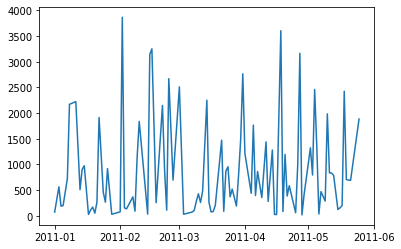

In [47]:
plt.plot(time_series['order_date'], time_series['sum']['Total_Cost'])
plt.show()